In [31]:
import pandas as pd

# Assuming '14484CA85F912-wsense.json' is your JSON file with the full path
data = pd.read_json('wrsense.json')

# Convert 'time' to datetime for better handling
data['time'] = pd.to_datetime(data['time'])

# Remove specified columns directly
data.drop(columns=['seqNumber', 'rssi', 'transmissionSeqNumber', 'firmwareVersion', 'networkId'], inplace=True)

# Remove rows with any null values
data.dropna(inplace=True)
# Configure Pandas to display all rows, if desired
pd.set_option('display.max_rows', None)

# Display the DataFrame to verify all rows
display(data)


,roadTemperature,airTemperature,airHumidity,precipitation,batteryLevel,time,createdAt
0,1.04,2.79,85.0,0.0,5.02,2023-12-25 20:01:13,2023-12-25T20:03:47.094
1,0.93,2.46,86.0,0.0,5.03,2023-12-25 20:05:34,2023-12-25T20:08:41.772
2,0.88,2.27,86.0,0.0,5.03,2023-12-25 20:10:40,2023-12-25T20:13:40.676
3,0.76,2.04,87.0,0.0,5.03,2023-12-25 20:15:40,2023-12-25T20:19:10.784
4,0.76,2.04,87.0,0.0,5.03,2023-12-25 20:15:40,2023-12-25T20:23:16.897
5,0.69,1.88,88.0,0.0,5.03,2023-12-25 20:20:54,2023-12-25T20:23:16.914
6,0.64,1.95,88.0,0.0,5.03,2023-12-25 20:25:17,2023-12-25T20:29:00.476
7,0.64,1.95,88.0,0.0,5.03,2023-12-25 20:25:17,2023-12-25T20:32:57.090
8,0.61,1.97,88.0,0.0,5.03,2023-12-25 20:29:11,2023-12-25T20:32:57.079
9,0.63,2.10,89.0,0.0,5.03,2023-12-25 20:34:57,2023-12-25T20:38:26.386


In [ ]:
#Top five rows in the dataset
data.head()

In [ ]:
#The info() method is useful to get a quick description of the data, in particular the
#total number of rows, each attribute’s type, and the number of nonnull values
data.info()

In [ ]:
data['roadTemperature'].value_counts()


In [ ]:
data['airTemperature'].value_counts()

In [ ]:
data['airHumidity'].value_counts()

In [ ]:
data['precipitation'].value_counts()

In [ ]:
data['batteryLevel'].value_counts()

In [ ]:
#The describe() method shows a summary of the numerical attributes
data.describe()

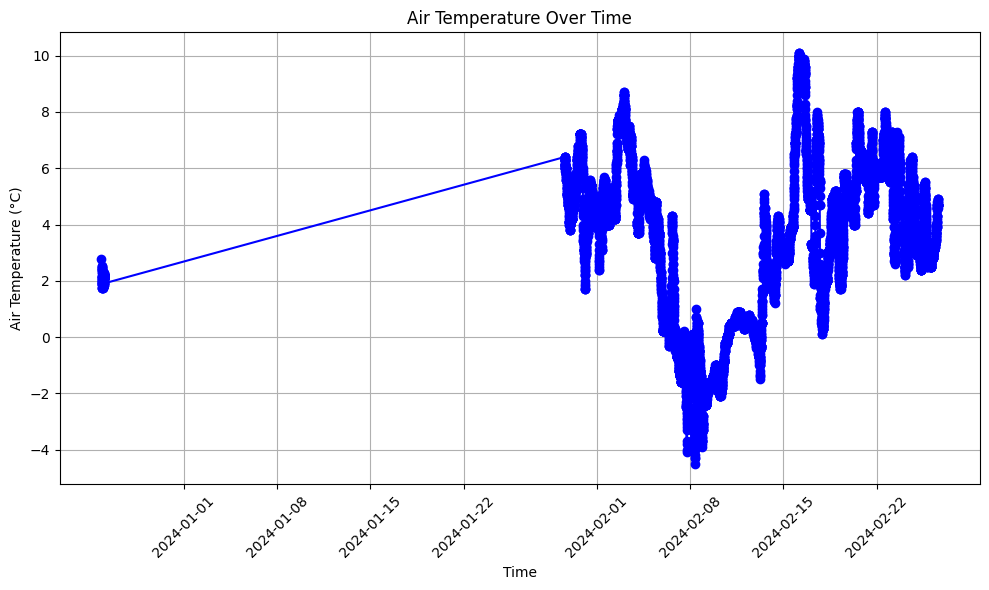

In [6]:
#Visualizing  Data: plot for Air Temperature
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
#data['createdAt'] = pd.to_datetime(data['createdAt'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['airTemperature'], marker='o', linestyle='-', color='blue')
plt.title('Air Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

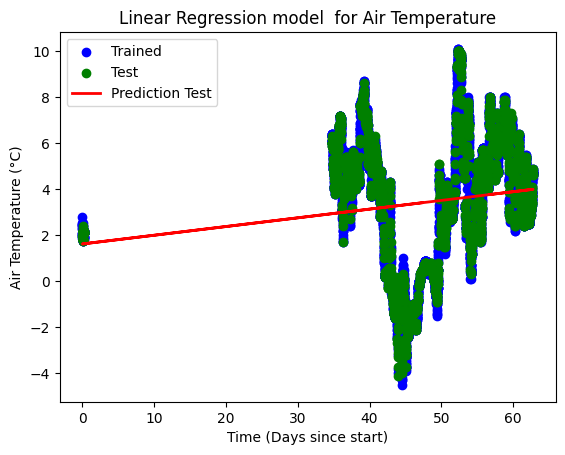

In [10]:
#Create a linear regression model for Air Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['airTemperature']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Temperature (°C)')
plt.title('Linear Regression model  for Air Temperature')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 0.006166631311281731


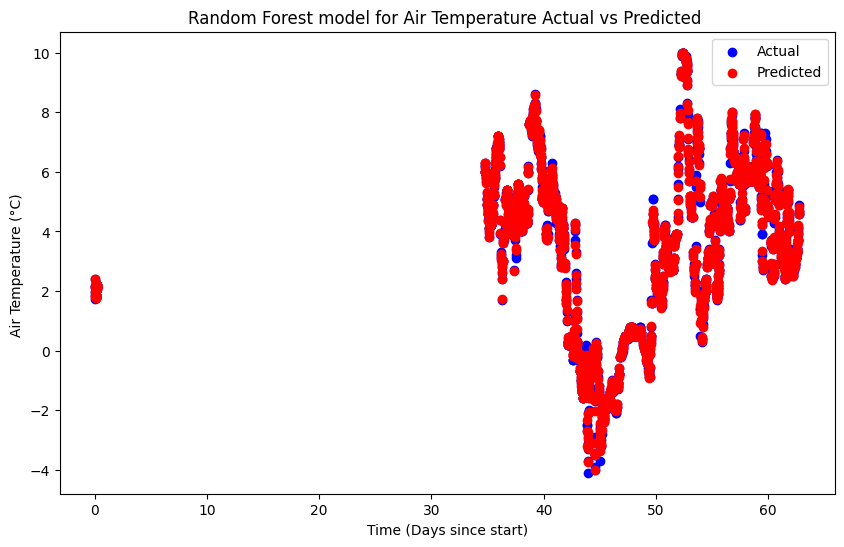

In [12]:
# the Random Forest model for Air Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_json('wrsense.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['airTemperature'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['airTemperature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Temperature (°C) ')
plt.title('Random Forest model for Air Temperature Actual vs Predicted ')
plt.legend()


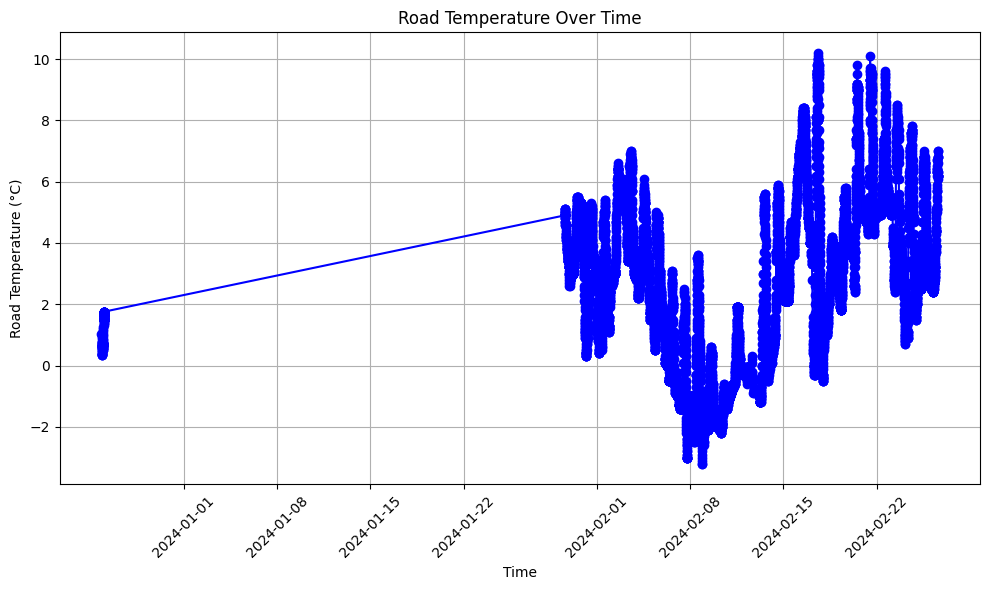

In [7]:
#Visualizing  Data: plot for Road Temperature
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
#data['createdAt'] = pd.to_datetime(data['createdAt'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['roadTemperature'], marker='o', linestyle='-', color='blue')
plt.title('Road Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Road Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

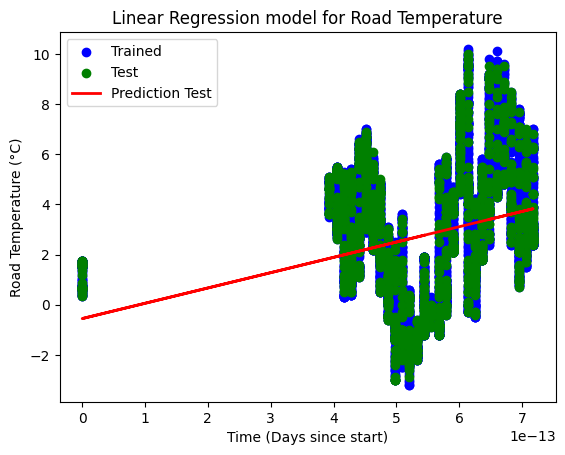

In [13]:
#Create a linear regression model for Road Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['roadTemperature']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Road Temperature (°C)')
plt.title('Linear Regression model for Road Temperature')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 0.00618183322504428


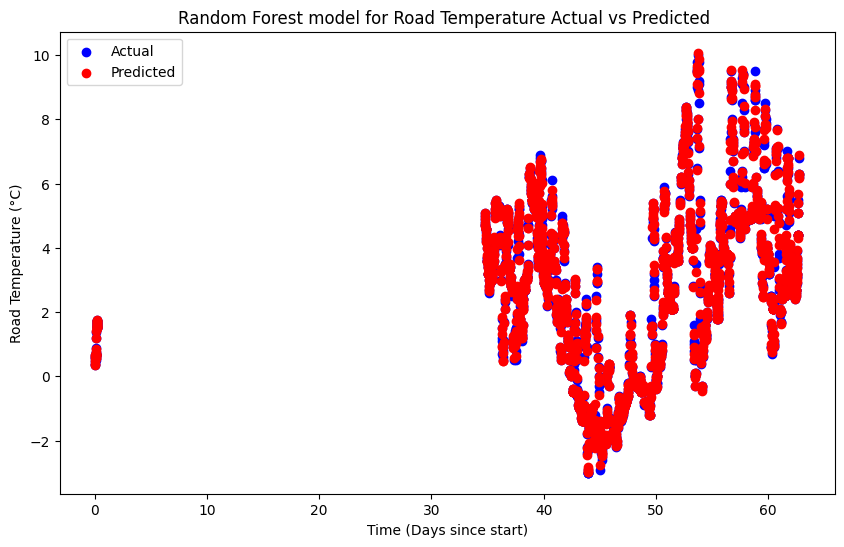

In [15]:
# the Random Forest model for Road Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Load data
data = pd.read_json('wrsense.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['roadTemperature'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['roadTemperature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Road Temperature (°C)')
plt.title('Random Forest model for Road Temperature Actual vs Predicted ')
plt.legend()
plt.show()


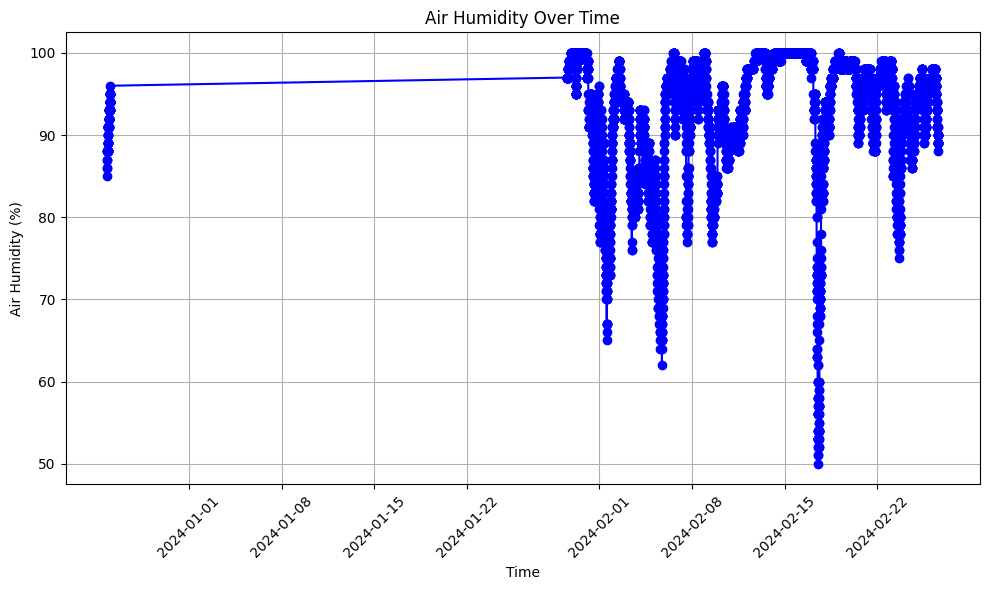

In [8]:
#Visualizing  Data: plot for Air Humidity
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['airHumidity'], marker='o', linestyle='-', color='blue')
plt.title('Air Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Air Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

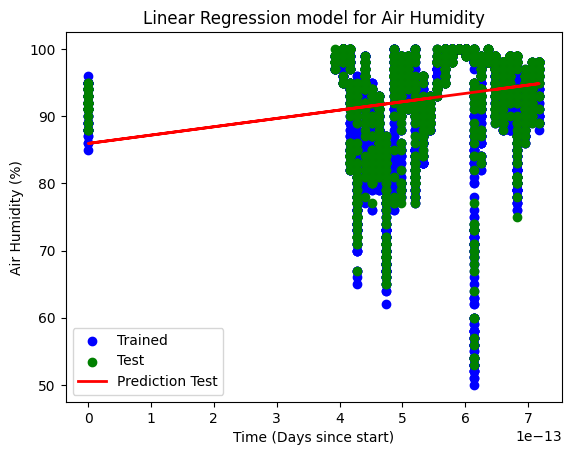

In [16]:
#Create a linear regression model for Air Humidity
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['airHumidity']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Humidity (%)')
plt.title('Linear Regression model for Air Humidity')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 0.20589551092734804


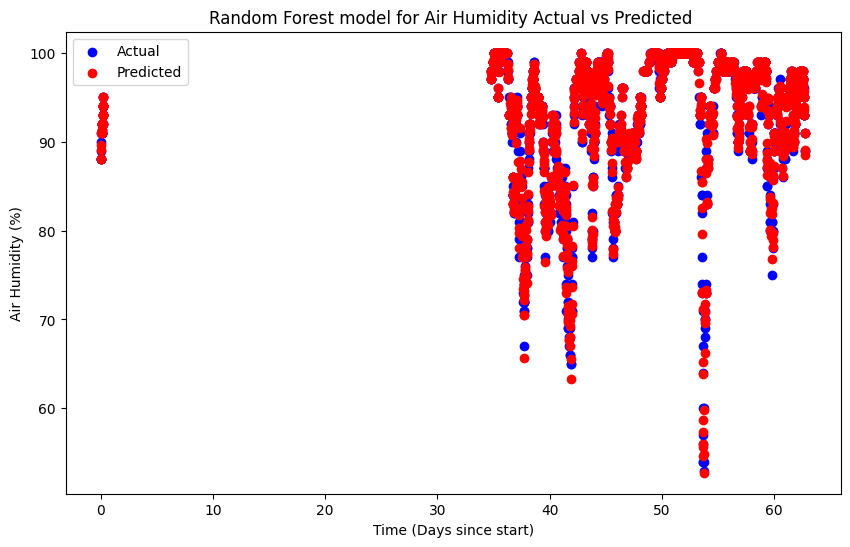

In [18]:
# the Random Forest model for Air Humidity
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_json('wrsense.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['airHumidity'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['airHumidity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Humidity (%)')
plt.title('Random Forest model for Air Humidity Actual vs Predicted ')
plt.legend()
plt.show()

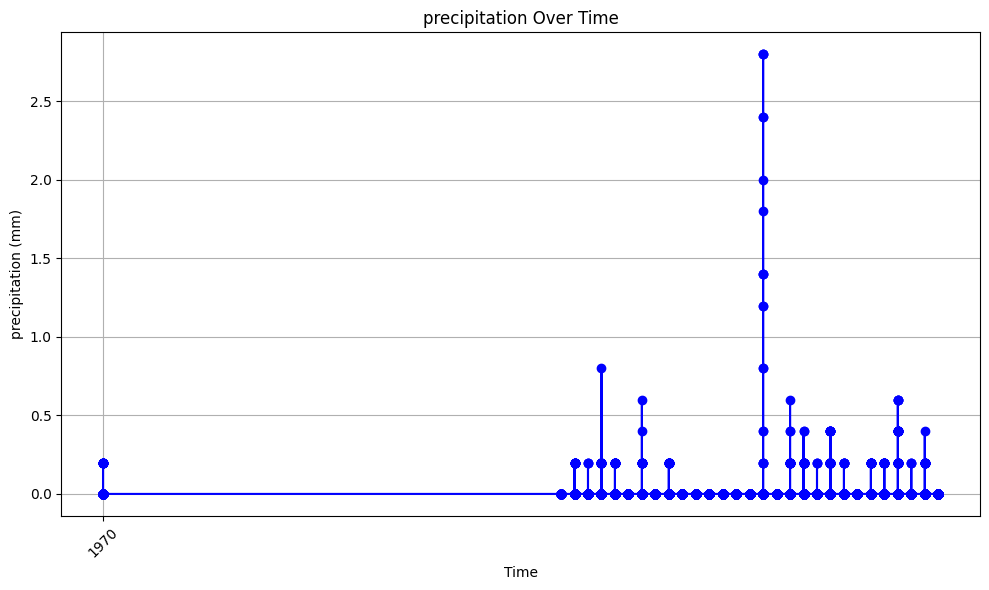

In [28]:
#Visualizing  Data: plot for precipitation
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['precipitation'], marker='o', linestyle='-', color='blue')
plt.title('precipitation Over Time')
plt.xlabel('Time')
plt.ylabel('precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

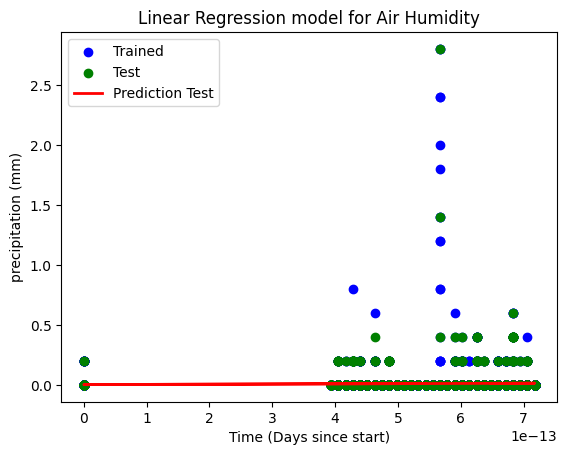

In [29]:
#Create a linear regression model for precipitation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['precipitation']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Precipitation (mm)')
plt.title('Linear Regression model for Air Humidity')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 0.002757840519787358


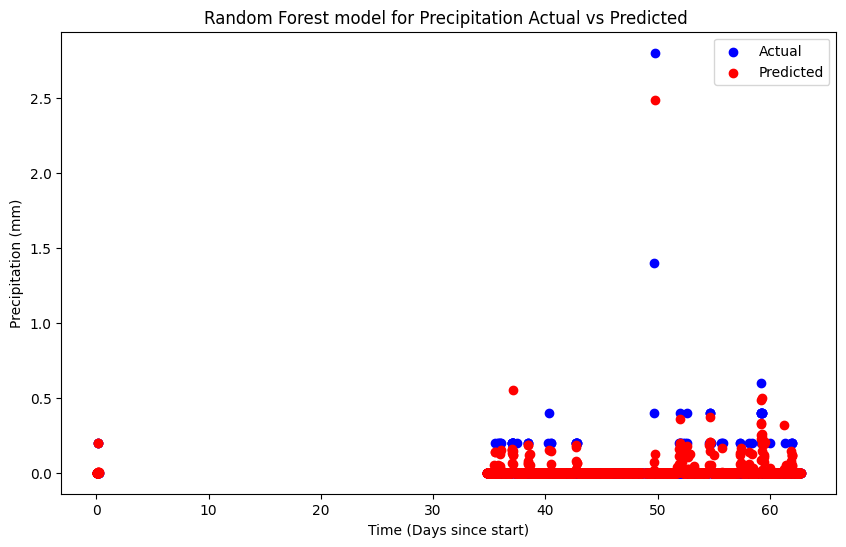

In [30]:
# the Random Forest model for Precipitation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_json('wrsense.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['precipitation'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['precipitation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Precipitation (mm)')
plt.title('Random Forest model for Precipitation Actual vs Predicted ')
plt.legend()
plt.show()

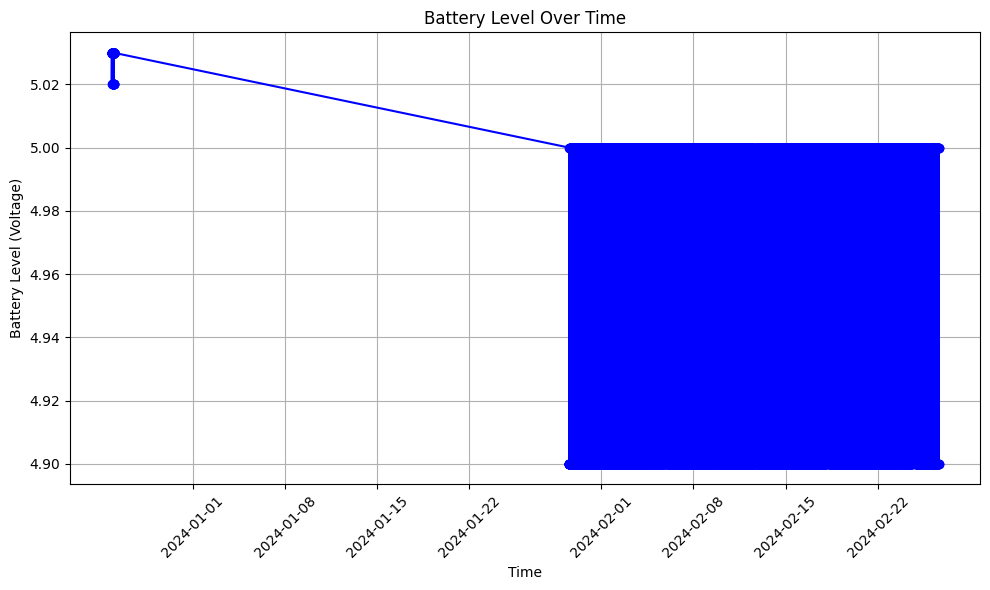

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['batteryLevel'], marker='o', linestyle='-', color='blue')
plt.title('Battery Level Over Time')
plt.xlabel('Time')
plt.ylabel('Battery Level (Voltage)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

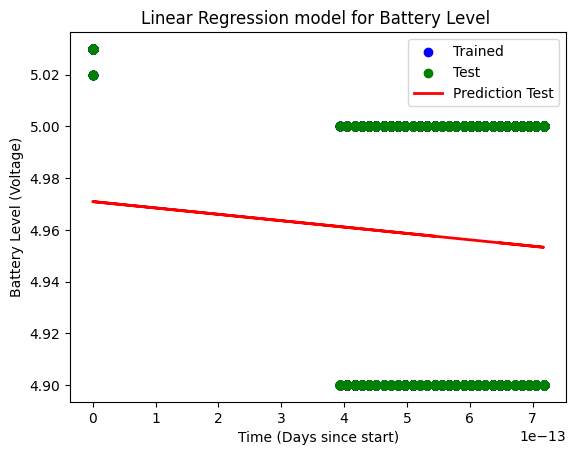

In [24]:
#Create a linear regression model for Battery Level
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['batteryLevel']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Battery Level (Voltage)')
plt.title('Linear Regression model for Battery Level ')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 0.0027120686414649616


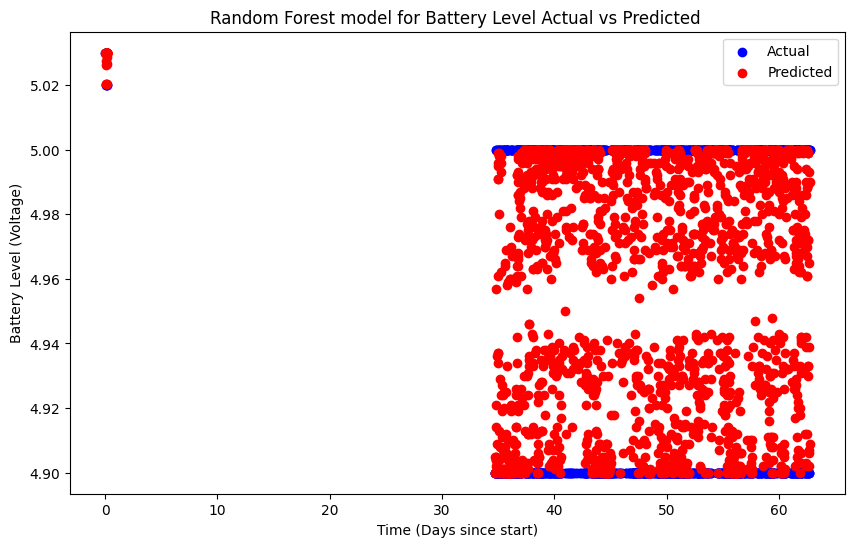

In [26]:
# the Random Forest model for Battery Level
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



# Load data
data = pd.read_json('wrsense.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['batteryLevel'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['batteryLevel']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Battery Level (Voltage)')
plt.title('Random Forest model for Battery Level Actual vs Predicted ')
plt.legend()
plt.show()